<a href="https://colab.research.google.com/github/erickunix/slm/blob/main/exam_Erick_Moreno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab Enrvirment was set for R manually by selecting "Change Runtime type"

In [ ]:

if(!require(caret)) install.packages("caret", repos = "http://cran.us.r-project.org")
if(!require(olsrr)) install.packages("olsrr", repos = "http://cran.us.r-project.org")
if(!require(mgcv)) install.packages("mgcv", repos = "http://cran.us.r-project.org")
if(!require(nnet)) install.packages("nnet", repos = "http://cran.us.r-project.org")
if(!require(rpart)) install.packages("rpart", repos = "http://cran.us.r-project.org")
if(!require(tidyverse)) install.packages("tidyverse", repos = "http://cran.us.r-project.org")
if(!require(rpart.plot)) install.packages("rpart.plot", repos = "http://cran.us.r-project.org")
if(!require(mltools)) install.packages("mltools", repos = "http://cran.us.r-project.org")
if(!require(PRROC)) install.packages("PRROC", repos = "http://cran.us.r-project.org")
if(!require(randomForest)) install.packages("randomForest", repos = "http://cran.us.r-project.org")


Loading required package: caret

Loading required package: lattice

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Loading required package: olsrr


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers


Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-35. For overview type 'help("mgcv-package")'.

Loading required package: nnet


Attaching package: ‘nnet’


The following object is masked from ‘package:mgcv’:

    multinom


Loading required package: rpart

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse() masks nlme::collapse()

In [ ]:
# Laboratory exam SLM 08.06.2021
# Duration: 2.5h
# Index number: 110084

# Task1(12p)
# In the task, use the data from 'http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric'
# You can load the data using:
read.fwf('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric', widths = rep(4, 25), header = FALSE)

# (1p) Rename 25th column to 'target'.It contains information about bank's clients default - 2 => client with a default, 1=> client with no default. Recode 'target' to mark client with default as 1 and 0 otherwise.
# (3p) Check frequencies of 'target' values. How can we cope with unbalanced data? Name at least 3 solutions. Randomly undersample the data to have 50/50 proportions of 'target' values.
# (1p) Divide balanced data into training (85%) and validation (15%) with seed equal to 32
# (1p) Build logistic regression model with 'glm' function. We want to classify 'target' using all other features in a dataset.
# (2p) Conduct feature selection using 'step' function. Use BIC (Bayesian Information Criterion) as model selection criterion. How many variables were removed from model compared to initial logistic regression?
# (4p) Using model after feature selection, conduct cost-based threshold optimization on test data with False Positive cost equal to 2 and False Negative Equal to 5. What is the optimal cutoff threshold?

# Task2(24p)
# Use the data under 'https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv', consisting data of people with breast cancer. If the patient has breast cancer variable Classification is 2, otherwise value 1 is used.
# The values in the data set are separated by a comma, they have headers (read it using function 'read.csv', with the stringsAsFactors parameter equal to FALSE).
# (1p) Check if any data is missing. If so, remove data from the dataset.
# (1p) Recode the variable Classification - ill patients should be denoted as 1 and healthy as 0 - do not create a new variable, but overwrite it
# (2p) By how many years on average (variable Age) people with breast cancer are older/younger than the others?
# (1p) What is the average Insulin level (Insulin variable) for users with a BMI over 21?
# (1p) Randomly divide observations into a training (90% share) and test (10%) set with a seed of 32.
# (2p) Prepare the decision tree from the 'rpart' package based on the data from the training set. The target variable is Classification, use all others to explain it. Set the parameter CP to 0. Remember that rpart infers a task by the type of target variable and we are interested in classification
# (3p) Choose the optimal level of tree complexity, based on CP parameter table produced by rpart. Cut the tree to the optimal size. Explain how to pick the optimal CP level.
# (2p) Draw a pruned decision tree from previous point (with rules).
# (2p) Write one example of decision rule generated by a tree (if ... and ... then we predict than patient is ...)
# (2p) Prepare the confusion matrix for the test set, assuming a cutoff threshold of 0.60
# (3p) Based on the confusion matrix created calculate accuracy, recall and precision. Verify the quality of the tree (subjectively).
# (2p) Draw a Lift curve for the prediction on the test set
# (2p) Calculate AUC for training and test set. Is the model overfitted? Why/Why not? (comment)

# Task3(14p)
# In the task, use the data from 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
# The quality of white wines is contained in a variable quality.
# The data is separated by a semicolon and has headers. You can load the data using:
read.table('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', stringsAsFactors = F, sep =';', header = T)

# (1p) Check if any data is missing. If so, remove missing data from the dataset.
# (2p) Prepare the histogram and density estimation curve (on the same plot) of the variable total.sulfur.dioxide.
# (1p) Divide data into training (80%) and validation (20%) with seed equal to 12
# (3p) Prepare a random forest model with library 'randomForest' using default parameter values, with wine quality as target variable and all other variables as predictors. Which 2 explanatory variables explain the most of wine quality variance?
# (3p) Prepare the GAM model with the 'mgcv' package, with wine quality as target variable and all other variables as predictors. Apply smoothing the spline only to 'chlorides' and 'sulphates' variables
# (2p) Prepare a linear regression model with an 'lm' package, with wine quality as target variable and all other variables as predictors. Provide Adjusted R-squared of the model.
# (2p) Compare the quality of 3 above models by measuring RMSE for each (on test set) and prepare barplot with those values. Which model is the best in terms of RMSE?

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,6,4,12,5,5,3,4,1,67,⋯,0,0,1,0,0,1,0,0,1,1
2,48,2,60,1,3,2,2,1,22,⋯,0,0,1,0,0,1,0,0,1,2
4,12,4,21,1,4,3,3,1,49,⋯,0,0,1,0,0,1,0,1,0,1
1,42,2,79,1,4,3,4,2,45,⋯,0,0,0,0,0,0,0,0,1,1
1,24,3,49,1,3,3,4,4,53,⋯,1,0,1,0,0,0,0,0,1,2
4,36,2,91,5,3,3,4,4,35,⋯,0,0,1,0,0,0,0,1,0,1
4,24,2,28,3,5,3,4,2,53,⋯,0,0,1,0,0,1,0,0,1,1
2,36,2,69,1,3,3,2,3,35,⋯,0,1,1,0,1,0,0,0,0,1
4,12,2,31,4,4,1,4,1,61,⋯,0,0,1,0,0,1,0,1,0,1


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,6
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6


In [ ]:
# Task1(12p)
# In the task, use the data from 'http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric'
# You can load the data using:
read.fwf('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric', widths = rep(4, 25), header = FALSE)

# (1p) Rename 25th column to 'target'.It contains information about bank's clients default - 2 => client with a default, 1=> client with no default. Recode 'target' to mark client with default as 1 and 0 otherwise.
# (3p) Check frequencies of 'target' values. How can we cope with unbalanced data? Name at least 3 solutions. Randomly undersample the data to have 50/50 proportions of 'target' values.
# (1p) Divide balanced data into training (85%) and validation (15%) with seed equal to 32
# (1p) Build logistic regression model with 'glm' function. We want to classify 'target' using all other features in a dataset.
# (2p) Conduct feature selection using 'step' function. Use BIC (Bayesian Information Criterion) as model selection criterion. How many variables were removed from model compared to initial logistic regression?
# (4p) Using model after feature selection, conduct cost-based threshold optimization on test data with False Positive cost equal to 2 and False Negative Equal to 5. What is the optimal cutoff threshold?

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,6,4,12,5,5,3,4,1,67,⋯,0,0,1,0,0,1,0,0,1,1
2,48,2,60,1,3,2,2,1,22,⋯,0,0,1,0,0,1,0,0,1,2
4,12,4,21,1,4,3,3,1,49,⋯,0,0,1,0,0,1,0,1,0,1
1,42,2,79,1,4,3,4,2,45,⋯,0,0,0,0,0,0,0,0,1,1
1,24,3,49,1,3,3,4,4,53,⋯,1,0,1,0,0,0,0,0,1,2
4,36,2,91,5,3,3,4,4,35,⋯,0,0,1,0,0,0,0,1,0,1
4,24,2,28,3,5,3,4,2,53,⋯,0,0,1,0,0,1,0,0,1,1
2,36,2,69,1,3,3,2,3,35,⋯,0,1,1,0,1,0,0,0,0,1
4,12,2,31,4,4,1,4,1,61,⋯,0,0,1,0,0,1,0,1,0,1


In [ ]:
print(installed.packages)

function (lib.loc = NULL, priority = NULL, noCache = FALSE, fields = NULL, 
    subarch = .Platform$r_arch, ...) 
{
    if (is.null(lib.loc)) 
        lib.loc <- .libPaths()
    if (!is.null(priority)) {
        if (!is.character(priority)) 
            stop("'priority' must be character or NULL")
        if (any(b <- priority %in% "high")) 
            priority <- c(priority[!b], "recommended", "base")
    }
    fields <- .instPkgFields(fields)
    retval <- matrix(character(), 0L, 2L + length(fields))
    for (lib in lib.loc) {
        if (noCache) {
            ret0 <- .readPkgDesc(lib, fields)
            if (length(ret0)) 
                retval <- rbind(retval, ret0, deparse.level = 0L)
        }
        else {
            base <- paste(c(lib, fields), collapse = ",")
            enc <- sprintf("%d_%s", nchar(base), .Call(C_crc64, 
                base))
            dest <- file.path(tempdir(), paste0("libloc_", enc, 
                ".rds"))
            test <- file.exists(dest)

In [ ]:
df <- read.fwf('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric', widths = rep(4, 25), header = FALSE)
print(head(df))


  V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21
1  1  6  4 12  5  5  3  4  1  67   3   2   1   2   1   0   0   1   0   0   1
2  2 48  2 60  1  3  2  2  1  22   3   1   1   1   1   0   0   1   0   0   1
3  4 12  4 21  1  4  3  3  1  49   3   1   2   1   1   0   0   1   0   0   1
4  1 42  2 79  1  4  3  4  2  45   3   1   2   1   1   0   0   0   0   0   0
5  1 24  3 49  1  3  3  4  4  53   3   2   2   1   1   1   0   1   0   0   0
6  4 36  2 91  5  3  3  4  4  35   3   1   2   2   1   0   0   1   0   0   0
  V22 V23 V24 V25
1   0   0   1   1
2   0   0   1   2
3   0   1   0   1
4   0   0   1   1
5   0   0   1   2
6   0   1   0   1


In [ ]:
# (1p) Rename 25th column to 'target'.It contains information about bank's clients default - 2 => client with a default, 1=> client with no default. Recode 'target' to mark client with default as 1 and 0 otherwise.

In [ ]:
names(df)[names(df) == "V25"] <- "target"


In [ ]:
# Recode 'target' to mark client with default as 1 and 0 otherwise.
df$target <- ifelse(df$target=="2", 1, 0) 

In [ ]:
print(head(df))

  V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21
1  1  6  4 12  5  5  3  4  1  67   3   2   1   2   1   0   0   1   0   0   1
2  2 48  2 60  1  3  2  2  1  22   3   1   1   1   1   0   0   1   0   0   1
3  4 12  4 21  1  4  3  3  1  49   3   1   2   1   1   0   0   1   0   0   1
4  1 42  2 79  1  4  3  4  2  45   3   1   2   1   1   0   0   0   0   0   0
5  1 24  3 49  1  3  3  4  4  53   3   2   2   1   1   1   0   1   0   0   0
6  4 36  2 91  5  3  3  4  4  35   3   1   2   2   1   0   0   1   0   0   0
  V22 V23 V24 target
1   0   0   1      0
2   0   0   1      1
3   0   1   0      0
4   0   0   1      0
5   0   0   1      1
6   0   1   0      0


In [ ]:
# (3p) Check frequencies of 'target' values. How can we cope with unbalanced data? Name at least 3 solutions. Randomly undersample the data to have 50/50 proportions of 'target' values.

In [ ]:
df2 <- df %>% group_by(target) %>% summarize(class_count = n())

In [ ]:
print(head(df2))

# A tibble: 2 x 2
  target class_count
   <dbl>       <int>
1      0         700
2      1         300


In [ ]:
prop.table(table(df$target))


  0   1 
0.7 0.3 

In [ ]:
# (1p) Divide balanced data into training (85%) and validation (15%) with seed equal to 32

In [ ]:
#set.seed(32)
#split = sample(1:nrow(df),0.85*nrow(df)) 
#training_set = df[indices,]
#test_set = DATA_SET[-indices,]


In [ ]:
# Task3(14p)
# In the task, use the data from 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
# The quality of white wines is contained in a variable quality.
# The data is separated by a semicolon and has headers. You can load the data using:
read.table('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', stringsAsFactors = F, sep =';', header = T)

# (1p) Check if any data is missing. If so, remove missing data from the dataset.
# (2p) Prepare the histogram and density estimation curve (on the same plot) of the variable total.sulfur.dioxide.
# (1p) Divide data into training (80%) and validation (20%) with seed equal to 12
# (3p) Prepare a random forest model with library 'randomForest' using default parameter values, with wine quality as target variable and all other variables as predictors. Which 2 explanatory variables explain the most of wine quality variance?
# (3p) Prepare the GAM model with the 'mgcv' package, with wine quality as target variable and all other variables as predictors. Apply smoothing the spline only to 'chlorides' and 'sulphates' variables
# (2p) Prepare a linear regression model with an 'lm' package, with wine quality as target variable and all other variables as predictors. Provide Adjusted R-squared of the model.
# (2p) Compare the quality of 3 above models by measuring RMSE for each (on test set) and prepare barplot with those values. Which model is the best in terms of RMSE?

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,6
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6


In [ ]:
dr <- read.table('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', stringsAsFactors = F, sep =';', header = T)
dr

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,6
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6


In [ ]:
# (1p) Check if any data is missing. If so, remove missing data from the dataset.

In [ ]:
print(sum(is.na(dr))) # no missing values 

[1] 0


In [ ]:
# (2p) Prepare the histogram and density estimation curve (on the same plot) of the variable total.sulfur.dioxide.

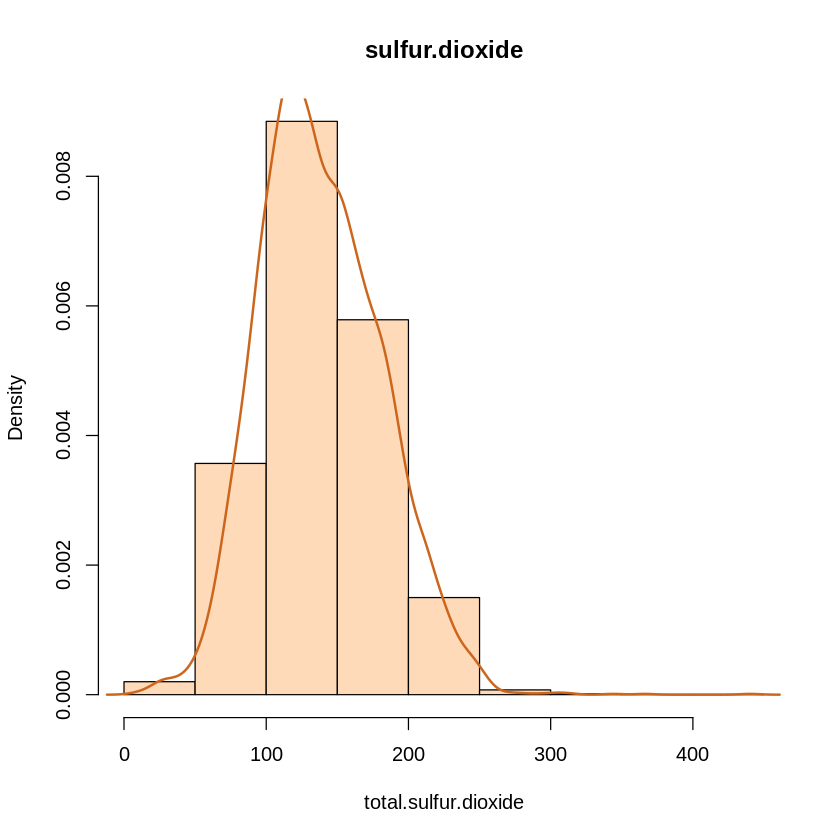

In [ ]:
hist(dr$total.sulfur.dioxide, # histogram
 col="peachpuff", # column color
 border="black",
 prob = TRUE, # show densities instead of frequencies
 xlab = "total.sulfur.dioxide",
 main = "sulfur.dioxide")
lines(density(dr$total.sulfur.dioxide), # density plot
 lwd = 2, # thickness of line
 col = "chocolate3")

In [ ]:
#(1p) Divide data into training (80%) and validation (20%) with seed equal to 12

In [ ]:
set.seed(12)
smp = sample(1:nrow(dr),0.8*nrow(dr)) 
train= dr[smp,]
test = dr[-smp,]

In [ ]:
str(train)
str(test)

'data.frame':	3918 obs. of  12 variables:
 $ fixed.acidity       : num  6.3 6.6 6.6 8 6.6 8.5 5.3 7.1 6.7 6.4 ...
 $ volatile.acidity    : num  0.25 0.27 0.38 0.22 0.26 0.28 0.36 0.21 0.51 0.16 ...
 $ citric.acid         : num  0.53 0.25 0.28 0.42 0.46 0.34 0.27 0.4 0.24 0.22 ...
 $ residual.sugar      : num  1.8 1.2 2.8 14.6 6.9 13.8 6.3 1.2 2.1 1.4 ...
 $ chlorides           : num  0.021 0.033 0.043 0.044 0.047 0.041 0.028 0.069 0.043 0.04 ...
 $ free.sulfur.dioxide : num  41 36 17 45 59 32 40 24 14 41 ...
 $ total.sulfur.dioxide: num  101 111 67 163 183 161 132 156 155 149 ...
 $ density             : num  0.989 0.989 0.989 1 0.996 ...
 $ pH                  : num  3.19 3.16 3.21 3.21 3.2 3.13 3.37 3.42 3.22 3.49 ...
 $ sulphates           : num  0.31 0.37 0.47 0.69 0.45 0.4 0.4 0.43 0.6 0.58 ...
 $ alcohol             : num  13 12.4 13.2 8.6 9.3 9.9 11.6 10.6 13 10 ...
 $ quality             : int  6 6 6 7 5 6 6 6 6 6 ...
'data.frame':	980 obs. of  12 variables:
 $ fixed.acidity   

In [ ]:
# Prepare a random forest model with library 'randomForest' using default parameter values, with wine quality as target variable and all other variables as predictors. Which 2 explanatory variables explain the most of wine quality variance?

In [ ]:
library(randomForest)

In [ ]:
str(train)

'data.frame':	3918 obs. of  12 variables:
 $ fixed.acidity       : num  6.3 6.6 6.6 8 6.6 8.5 5.3 7.1 6.7 6.4 ...
 $ volatile.acidity    : num  0.25 0.27 0.38 0.22 0.26 0.28 0.36 0.21 0.51 0.16 ...
 $ citric.acid         : num  0.53 0.25 0.28 0.42 0.46 0.34 0.27 0.4 0.24 0.22 ...
 $ residual.sugar      : num  1.8 1.2 2.8 14.6 6.9 13.8 6.3 1.2 2.1 1.4 ...
 $ chlorides           : num  0.021 0.033 0.043 0.044 0.047 0.041 0.028 0.069 0.043 0.04 ...
 $ free.sulfur.dioxide : num  41 36 17 45 59 32 40 24 14 41 ...
 $ total.sulfur.dioxide: num  101 111 67 163 183 161 132 156 155 149 ...
 $ density             : num  0.989 0.989 0.989 1 0.996 ...
 $ pH                  : num  3.19 3.16 3.21 3.21 3.2 3.13 3.37 3.42 3.22 3.49 ...
 $ sulphates           : num  0.31 0.37 0.47 0.69 0.45 0.4 0.4 0.43 0.6 0.58 ...
 $ alcohol             : num  13 12.4 13.2 8.6 9.3 9.9 11.6 10.6 13 10 ...
 $ quality             : int  6 6 6 7 5 6 6 6 6 6 ...


In [ ]:
rf_classifier = randomForest(quality ~ ., data=train, ntree=100, mtry=2, importance=TRUE)

In [ ]:
rf_classifier



Call:
 randomForest(formula = quality ~ ., data = train, ntree = 100,      mtry = 2, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 2

          Mean of squared residuals: 0.3885356
                    % Var explained: 50.65

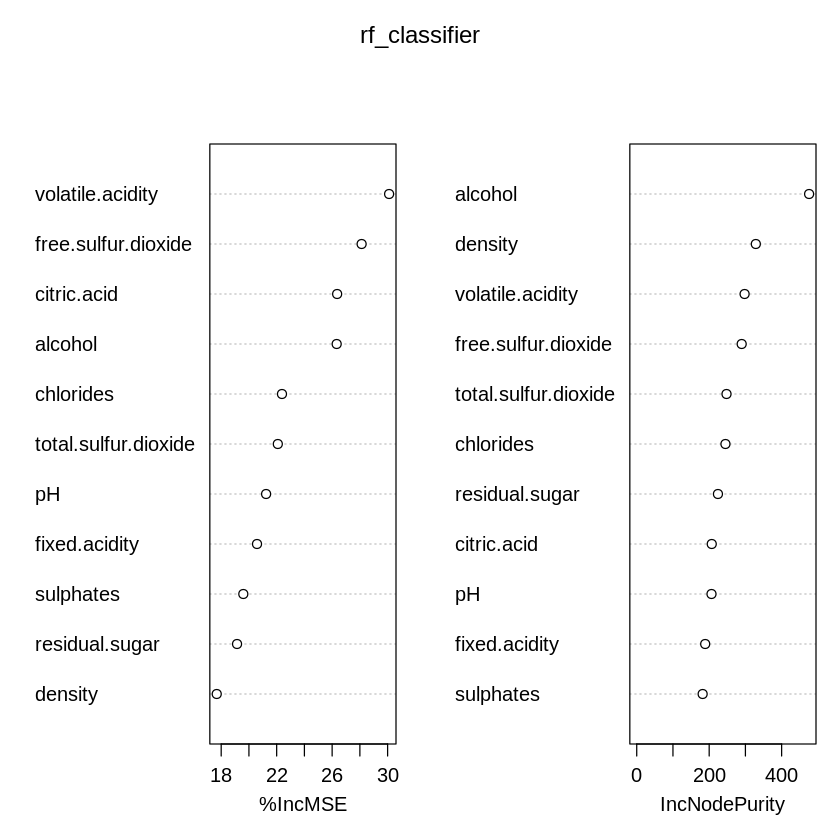

In [ ]:
varImpPlot(rf_classifier)

In [ ]:
# (3p) Prepare the GAM model with the 'mgcv' package, with wine quality as target variable and all other variables as predictors. Apply smoothing the spline only to 'chlorides' and 'sulphates' variables

In [ ]:
library(mgcv)

In [ ]:
model = gam(train$quality ~ s(train$chlorides) + train$volatile.acidity 
                + train$citric.acid + train$residual.sugar + s(train$sulphates 
                + train$free.sulfur.dioxide + train$total.sulfur.dioxide + train$pH 
                + train$alcohol + train$fixed.acidity) , data = train)
print(model)



Warning message in term[i] <- attr(terms(reformulate(term[i])), "term.labels"):
“number of items to replace is not a multiple of replacement length”



Family: gaussian 
Link function: identity 

Formula:
train$quality ~ s(train$chlorides) + train$volatile.acidity + 
    train$citric.acid + train$residual.sugar + s(train$sulphates + 
    train$free.sulfur.dioxide + train$total.sulfur.dioxide + 
    train$pH + train$alcohol + train$fixed.acidity)

Estimated degrees of freedom:
5.16 8.16  total = 17.32 

GCV score: 0.685339     


In [ ]:
# (2p) Prepare a linear regression model with an 'lm' package, with wine quality as target variable and all other variables as predictors. Provide Adjusted R-squared of the model.

In [ ]:
names(train)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

In [ ]:
#model <- lm(quality, data = train

In [ ]:


# Task2(24p)
# Use the data under 'https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv', consisting data of people with breast cancer. If the patient has breast cancer variable Classification is 2, otherwise value 1 is used.
# The values in the data set are separated by a comma, they have headers (read it using function 'read.csv', with the stringsAsFactors parameter equal to FALSE).
# (1p) Check if any data is missing. If so, remove data from the dataset.
# (1p) Recode the variable Classification - ill patients should be denoted as 1 and healthy as 0 - do not create a new variable, but overwrite it
# (2p) By how many years on average (variable Age) people with breast cancer are older/younger than the others?
# (1p) What is the average Insulin level (Insulin variable) for users with a BMI over 21?
# (1p) Randomly divide observations into a training (90% share) and test (10%) set with a seed of 32.
# (2p) Prepare the decision tree from the 'rpart' package based on the data from the training set. The target variable is Classification, use all others to explain it. Set the parameter CP to 0. Remember that rpart infers a task by the type of target variable and we are interested in classification
# (3p) Choose the optimal level of tree complexity, based on CP parameter table produced by rpart. Cut the tree to the optimal size. Explain how to pick the optimal CP level.
# (2p) Draw a pruned decision tree from previous point (with rules).
# (2p) Write one example of decision rule generated by a tree (if ... and ... then we predict than patient is ...)
# (2p) Prepare the confusion matrix for the test set, assuming a cutoff threshold of 0.60
# (3p) Based on the confusion matrix created calculate accuracy, recall and precision. Verify the quality of the tree (subjectively).
# (2p) Draw a Lift curve for the prediction on the test set
# (2p) Calculate AUC for training and test set. Is the model overfitted? Why/Why not? (comment)



In [ ]:
dt <-read.csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv', sep=',', header = TRUE, stringsAsFactors = FALSE)

In [ ]:
dt

Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
48,23.50000,70,2.707,0.4674087,8.8071,9.702400,7.99585,417.114,1
83,20.69049,92,3.115,0.7068973,8.8438,5.429285,4.06405,468.786,1
82,23.12467,91,4.498,1.0096511,17.9393,22.432040,9.27715,554.697,1
68,21.36752,77,3.226,0.6127249,9.8827,7.169560,12.76600,928.220,1
86,21.11111,92,3.549,0.8053864,6.6994,4.819240,10.57635,773.920,1
49,22.85446,92,3.226,0.7320869,6.8317,13.679750,10.31760,530.410,1
89,22.70000,77,4.690,0.8907873,6.9640,5.589865,12.93610,1256.083,1
76,23.80000,118,6.470,1.8832013,4.3110,13.251320,5.10420,280.694,1
73,22.00000,97,3.350,0.8015433,4.4700,10.358725,6.28445,136.855,1


In [ ]:
# Use the data under 'https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv', consisting data of people with breast cancer. If the patient has breast cancer variable Classification is 2, otherwise value 1 is used.

In [ ]:
print(sum(is.na(dt)))

[1] 0


In [ ]:

# (1p) Recode the variable Classification - ill patients should be denoted as 1 and healthy as 0 - do not create a new variable, but overwrite it

In [ ]:
unique(dt['Classification'])

,Classification
,<int>
1,1
53,2


In [ ]:
dt['Classification'] <- ifelse(dt['Classification']=="1", 0, 1)

In [ ]:
unique(dt['Classification'])

,Classification
,"<dbl[,1]>"
1,0
53,1


In [ ]:
# (2p) By how many years on average (variable Age) people with breast cancer are older/younger than the others?

In [ ]:
ill <- dt[dt["Classification"] == "1",]

In [ ]:
ill_age_mean <- colMeans(ill["Age"])
ill_age_mean

Age 
56.67188

In [ ]:
healthy <- dt[dt["Classification"] == "0",]
healthy_age_mean <- colMeans(healthy["Age"])
healthy_age_mean

Age 
58.07692

In [ ]:
healthy_age_mean - ill_age_mean

Age 
1.405048

People with breast cancer are by avarage 1.40504807692308 younger

In [ ]:
# (1p) What is the average Insulin level (Insulin variable) for users with a BMI over 21?

In [ ]:
bmi_over_21 <- dt[dt["BMI"] > "21",]

In [ ]:
mean_insulin <- colMeans(dt["Insulin"])

In [ ]:
mean_insulin

Insulin 
10.01209

In [ ]:
# (1p) Randomly divide observations into a training (90% share) and test (10%) set with a seed of 32.

In [ ]:
set.seed(32)

In [ ]:
indices = sample(1:nrow(dt),0.9*nrow(dt)) 
training = dt[indices,]
testing = dt[-indices,]


In [ ]:
# (2p) Prepare the decision tree from the 'rpart' package based on the data from the training set. The target variable is Classification, use all others to explain it. Set the parameter CP to 0. Remember that rpart infers a task by the type of target variable and we are interested in classification

In [ ]:
library(rpart)

rpart_tree <- rpart(training$Classification ~., data=training,cp=0)


In [ ]:
# (3p) Choose the optimal level of tree complexity, based on CP parameter table produced by rpart. Cut the tree to the optimal size. Explain how to pick the optimal CP level.

In [ ]:
#cp parameter table
rpart_tree$cptable

,CP,nsplit,rel error,xerror,xstd
1,0.228843537,0,1.0000000,1.0156989,0.01266624
2,0.093089868,1,0.7711565,0.9359558,0.08969440
3,0.073469388,3,0.5849767,1.0004580,0.10746218
4,0.029206897,4,0.5115073,0.9171811,0.10916764
5,0.016114498,5,0.4823004,0.9469041,0.11169573
6,0.006894488,6,0.4661859,0.9380483,0.10871305
7,0.000000000,7,0.4592915,0.9238225,0.10467782


Optimal CP level is the one for which xerror (cross validation error) value is the lowest - based on the above table the optimal cp value is 0.01929281. 

In [ ]:
pruned_tree <- prune(rpart_tree, 0.01929281	)

In [ ]:
# (2p) Draw a pruned decision tree from previous point (with rules).

In [ ]:
library("rpart.plot")

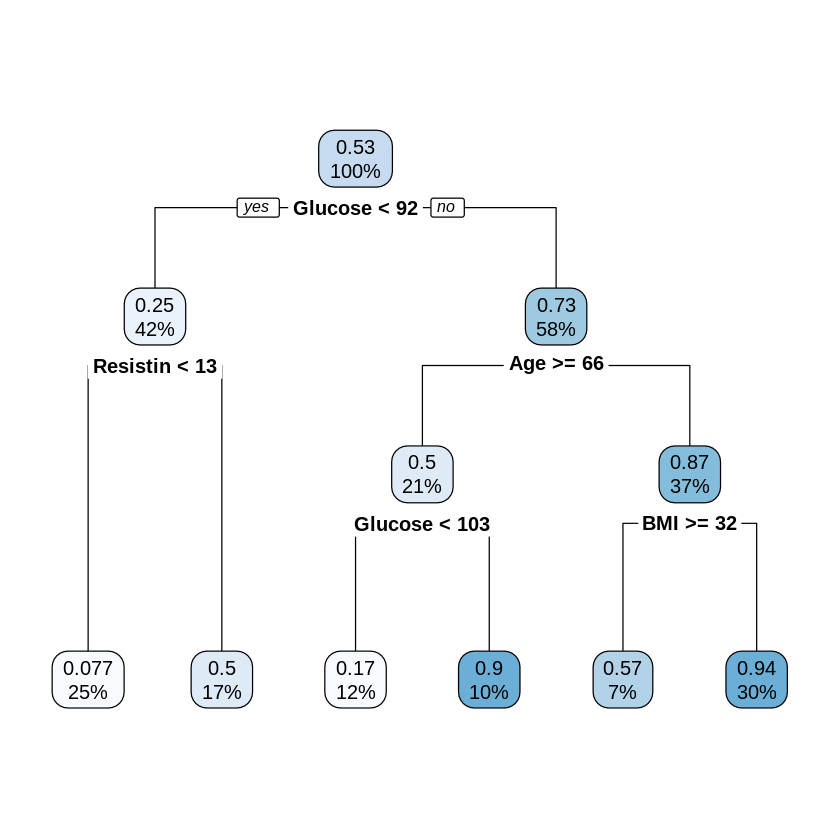

In [ ]:
rpart.plot(pruned_tree)

In [ ]:
# (2p) Write one example of decision rule generated by a tree (if ... and ... then we predict than patient is ...)

If Glucose < 92 and Resistin is < 13 then we predict than patient is healthy.

In [ ]:
# (2p) Prepare the confusion matrix for the test set, assuming a cutoff threshold of 0.60

In [ ]:
prediction = predict(pruned_tree, testing)

In [ ]:
prediction

12         35         51         58         62         81         83 
0.07692308 0.07692308 0.90000000 0.16666667 0.90000000 0.50000000 0.57142857 
        93         94         96        109        115 
0.50000000 0.57142857 0.50000000 0.90000000 0.07692308

In [ ]:
#confusionMatrix(table(prediction, testing$Classification), cutoff = 0.6)

In [ ]:
# (3p) Based on the confusion matrix created calculate accuracy, recall and precision. Verify the quality of the tree (subjectively).

In [ ]:
#Precision = TruePositives / (TruePositives + FalsePositives)
#Recall = TruePositives / (TruePositives + FalseNegatives)
#Accuracy = (TP + TN)/ Total

# (2p) Draw a Lift curve for the prediction on the test set


In [ ]:
# (2p) Calculate AUC for training and test set. Is the model overfitted? Why/Why not? (comment)

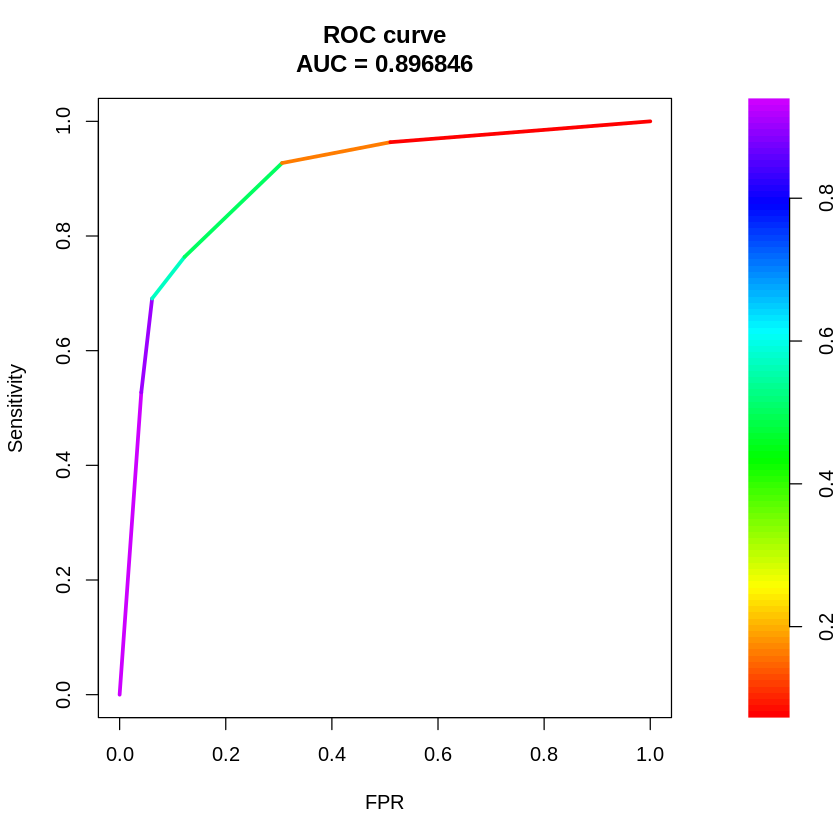

In [ ]:
library(PRROC)

pred = predict(pruned_tree, newdata=training)
PRROC_obj <- roc.curve(scores.class0 = pred, weights.class0=training$Classification,
                       curve=TRUE)
plot(PRROC_obj)

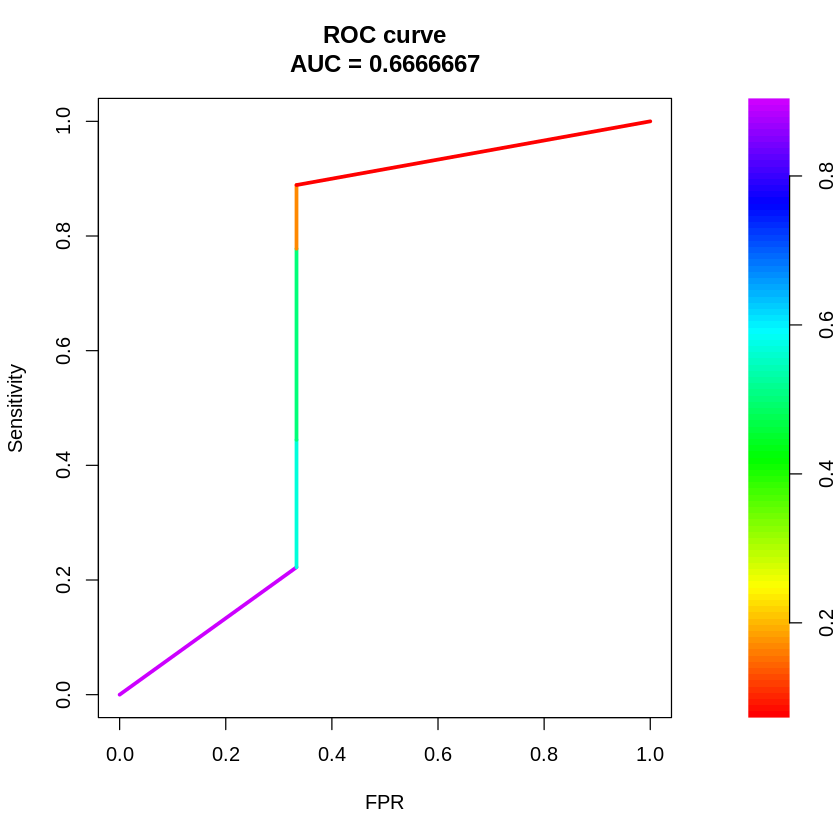

In [ ]:
library(PRROC)

pred = predict(pruned_tree, newdata=testing)
PRROC_obj <- roc.curve(scores.class0 = pred, weights.class0=testing$Classification,
                       curve=TRUE)
plot(PRROC_obj)

Yes, there is overfitting - auc for training set is over 90% and for testing is 67 (much lower).